<a href="https://colab.research.google.com/github/FranciaAlday/Proyectos/blob/main/PPCienciaDatos/Tareas/Examen2PPCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fotos


# 3.
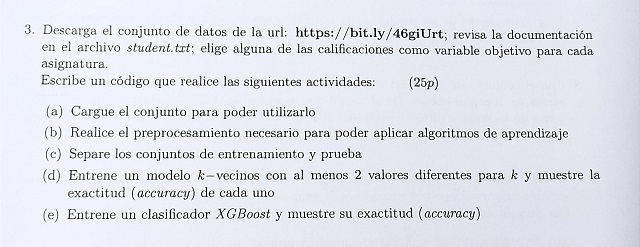

https://bit.ly/46giUrt

student.txt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
text = open("student.txt", "r")
print(text.read())

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or 

## a) Cargar datos

In [ ]:
data = pd.read_csv('student-mat.csv', sep=';', header=0)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## b) Preprocesaiento

In [ ]:
# Verifica si hay datos faltantes en columnas
missing_values = data.isnull().sum()

# Muestra la cantidad de datos faltantes por columna
print(missing_values)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [ ]:
# Variables independientes (X): columnas 1 a 30
X = data.iloc[:, :30]

# Variable dependiente (y): columna 31 G1 - first period grade (numeric: from 0 to 20)
y = data.iloc[:, 30]

In [ ]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


In [ ]:
# Codificación one-hot para las columnas con más de dos etiquetas
X = pd.get_dummies(data, columns=['Mjob', 'Fjob', 'reason', 'guardian'])

In [ ]:
# Mapeo para las demás columnas binarias
binary_mapping = {'GP': 0, 'MS': 1, 'F': 0, 'M': 1, 'U': 0, 'R': 1, 'LE3': 0, 'GT3': 1, 'T': 0, 'A': 1}
binary_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus']

# Aplicar el mapeo a las columnas binarias
X[binary_columns] = X[binary_columns].apply(lambda x: x.map(binary_mapping))

In [ ]:
# Mapeo para las columnas con "yes" y "no"
yes_no_mapping = {'yes': 1, 'no': 0}

columns_to_map = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
X[columns_to_map] = X[columns_to_map].apply(lambda x: x.map(yes_no_mapping))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Columnas numéricas
numeric_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
                   'goout', 'Dalc', 'Walc', 'health', 'absences']
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

In [ ]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,1.023046,0,1,1,1.143856,1.360371,0.792251,-0.042286,...,0,0,1,1,0,0,0,0,1,0
1,0,0,0.238380,0,1,0,-1.600009,-1.399970,-0.643249,-0.042286,...,1,0,0,1,0,0,0,1,0,0
2,0,0,-1.330954,0,0,0,-1.600009,-1.399970,-0.643249,-0.042286,...,1,0,0,0,0,1,0,0,1,0
3,0,0,-1.330954,0,1,0,1.143856,-0.479857,-0.643249,1.150779,...,0,1,0,0,1,0,0,0,1,0
4,0,0,-0.546287,0,1,0,0.229234,0.440257,-0.643249,-0.042286,...,1,0,0,0,1,0,0,1,0,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             395 non-null    int64  
 1   sex                395 non-null    int64  
 2   age                395 non-null    float64
 3   address            395 non-null    int64  
 4   famsize            395 non-null    int64  
 5   Pstatus            395 non-null    int64  
 6   Medu               395 non-null    float64
 7   Fedu               395 non-null    float64
 8   traveltime         395 non-null    float64
 9   studytime          395 non-null    float64
 10  failures           395 non-null    float64
 11  schoolsup          395 non-null    int64  
 12  famsup             395 non-null    int64  
 13  paid               395 non-null    int64  
 14  activities         395 non-null    int64  
 15  nursery            395 non-null    int64  
 16  higher             395 non

## c) Separación datos

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316, 46), (79, 46), (316,), (79,))

## d) Entrenamiento y Accuracy con KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Probar con dos valores diferentes de k
k_values = [2,5,9,]

for k in k_values:
    # Inicializar el clasificador k-NN
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Entrenar el modelo
    knn_classifier.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = knn_classifier.predict(X_test)

    # Calcular y mostrar la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy para k={k}: {accuracy}')

Accuracy para k=2: 0.31645569620253167
Accuracy para k=5: 0.3924050632911392
Accuracy para k=9: 0.379746835443038


## e) XGBoost

In [ ]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Para codificar las etiquetas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Clasificador XGBoost
xgb_classifier = xgb.XGBClassifier()
# Entrenamiento
xgb_classifier.fit(X_train, y_train_encoded)

# Transformar las etiquetas de clase en valores secuenciales en el conjunto de prueba
y_test_common_classes = y_test[y_test.isin(label_encoder.classes_)]
y_test_encoded = label_encoder.transform(y_test_common_classes)

# Predicciones
y_pred = xgb_classifier.predict(X_test.loc[y_test.isin(label_encoder.classes_)])

# Precisión del modelo
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy del modelo XGBoost: {accuracy}')

Accuracy del modelo XGBoost: 0.9743589743589743


XGBoost si funcionó para determinar las calificaciones del primer periodo en base a las demás características.

Con KNN se probó con k´s más altas pero el accuracy no mejoraba, el más alto fue:

Accuracy para k=5: 0.3924050632911392

Pero esto para nada es un buen accuracy, no sabe clasificar y al parecer no puede agrupar por calificaciones similares en base a las características.

# 8.
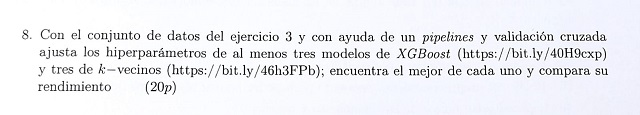

https://bit.ly/40H9cxp


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb


# KNN Pipeline con búsqueda de hiperparámetros
knn_pipeline = Pipeline([
    ('preprocessor', StandardScaler()),  # Escalamiento como parte del pipeline
    ('classifier', GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors': [2, 5, 9]},
                                cv=StratifiedKFold(n_splits=5), scoring=make_scorer(accuracy_score)))
])

# Entrenar el modelo KNN dentro del pipeline
knn_pipeline.fit(X_train, y_train)

# Obtener los mejores parámetros para KNN desde el pipeline
best_knn_params = knn_pipeline.named_steps['classifier'].best_params_

# Imprimir los mejores parámetros para KNN
print("Mejores parámetros para KNN:", best_knn_params)

Mejores parámetros para KNN: {'n_neighbors': 9}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
# XGBoost Pipeline con búsqueda de hiperparámetros
xgb_pipeline = Pipeline([
    ('preprocessor', StandardScaler()),  # Escalamiento como parte del pipeline
    ('classifier', GridSearchCV(xgb.XGBClassifier(),
                                param_grid={'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
                                cv=StratifiedKFold(n_splits=5), scoring=make_scorer(accuracy_score)))
])

# Para codificar las etiquetas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Entrenar el modelo XGBoost dentro del pipeline
xgb_pipeline.fit(X_train, y_train_encoded)

# Transformar las etiquetas de clase en valores secuenciales en el conjunto de prueba
y_test_common_classes = y_test[y_test.isin(label_encoder.classes_)]
y_test_encoded = label_encoder.transform(y_test_common_classes)

# Obtener los mejores parámetros para XGBoost desde el pipeline
best_xgb_params = xgb_pipeline.named_steps['classifier'].best_params_

# Imprimir los mejores parámetros para XGBoost
print("Mejores parámetros para XGBoost:", best_xgb_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Mejores parámetros para XGBoost: {'max_depth': 3, 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1467, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6

# 5.

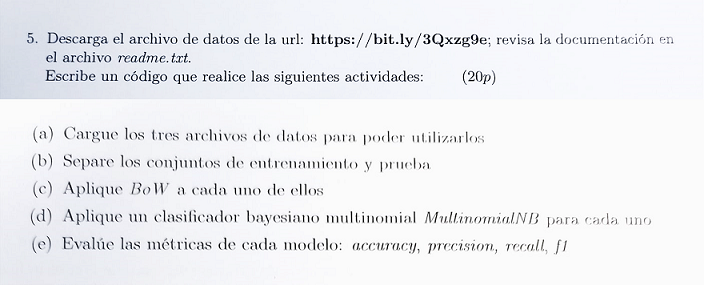

https://bit.ly/3Qxzg9e


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## a) Cargar datos

In [ ]:
readme = open("readme.txt", "r")
print(readme.read())

This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015
Please cite the paper if you want to use it :)

It contains sentences labelled with positive or negative sentiment, extracted from reviews of products, movies, and restaurants

Format:
sentence \t score \n


Details:
Score is either 1 (for positive) or 0 (for negative)	
The sentences come from three different websites/fields:

imdb.com
amazon.com
yelp.com

For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews. 
We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.



For the full datasets look:

imdb: Maas et. al., 2011 'Learning word vectors for sentiment analysis'
amazon: McAuley et. al., 2013 'Hidden factors and hidden topics: Understanding rating dimensions with review text'
yelp: Yelp dataset challenge 

In [ ]:
def cargar_datos(archivo):
  """ Función para cargar cada archivo txt
      frases: almacena las frase
      etiquetas: almacena las etiquetas
  """
  frases = []
  etiquetas = []
  with open(archivo, 'r') as file:
    for linea in file:
      frase, etiqueta = linea.strip().split('\t')
      frases.append(frase)
      etiquetas.append(int(etiqueta))
  return frases, etiquetas

In [ ]:
amazon_frases, amazon_etiquetas = cargar_datos("amazon_cells_labelled.txt")
imdb_frases, imdb_etiquetas = cargar_datos("imdb_labelled.txt")
yelp_frases, yelp_etiquetas = cargar_datos("yelp_labelled.txt")

## b) Separar conjuntos en train y test

In [ ]:
X_train_amazon, X_test_amazon, y_train_amazon, y_test_amazon = train_test_split(amazon_frases, amazon_etiquetas, test_size=0.2, random_state=123)

X_train_imdb, X_test_imdb, y_train_imdb, y_test_imdb = train_test_split(imdb_frases, imdb_etiquetas, test_size=0.2, random_state=123)

X_train_yelp, X_test_yelp, y_train_yelp, y_test_yelp = train_test_split(yelp_frases, yelp_etiquetas, test_size=0.2, random_state=123)

## c) Aplicar BoW

El proceso de Bag of Words (BoW) se aplica a través del uso de la clase CountVectorizer de scikit-learn.

In [ ]:
vec = CountVectorizer()

# Amazon
X_train_amazon = vec.fit_transform(X_train_amazon)
X_test_amazon = vec.transform(X_test_amazon)

#IMDB
X_train_imdb = vec.transform(X_train_imdb)
X_test_imdb = vec.transform(X_test_imdb)

#Yelp
X_train_yelp = vec.transform(X_train_yelp)
X_test_yelp = vec.transform(X_test_yelp)

## d) Aplicar Bayesiano Multinominal

In [ ]:
clf = MultinomialNB()

# Entrenar los clasificadores para cada wbsite
clf_amazon = clf.fit(X_train_amazon, y_train_amazon)
clf_imdb = clf.fit(X_train_imdb, y_train_imdb)
clf_yelp = clf.fit(X_train_yelp, y_train_yelp)

# Hacer predicciones en los conjuntos de prueba
pred_amazon = clf_amazon.predict(X_test_amazon)
pred_imdb = clf_imdb.predict(X_test_imdb)
pred_yelp = clf_yelp.predict(X_test_yelp)

## e) Evalución Métricas

In [ ]:
#Accuracy
acc_amazon = accuracy_score(y_test_amazon, pred_amazon)
acc_imdb = accuracy_score(y_test_imdb, pred_imdb)
acc_yelp = accuracy_score(y_test_yelp, pred_yelp)

print("Accuracy del clasificador de Amazon:", acc_amazon)
print("Accuracy del clasificador de IMDb:", acc_imdb)
print("Accuracy del clasificador de Yelp:", acc_yelp)

Accuracy del clasificador de Amazon: 0.76
Accuracy del clasificador de IMDb: 0.695
Accuracy del clasificador de Yelp: 0.77


In [ ]:
# Precision
p_amazon = precision_score(y_test_amazon, pred_amazon)
p_imdb = precision_score(y_test_imdb, pred_imdb)
p_yelp = precision_score(y_test_yelp, pred_yelp)

print("Precision del clasificador de Amazon:", p_amazon)
print("Precision del clasificador de IMDb:", p_imdb)
print("Precision del clasificador de Yelp:", p_yelp)

Precision del clasificador de Amazon: 0.7789473684210526
Precision del clasificador de IMDb: 0.7738095238095238
Precision del clasificador de Yelp: 0.7920792079207921


In [ ]:
# Recall
recall_amazon = recall_score(y_test_amazon, pred_amazon)
recall_imdb = recall_score(y_test_imdb, pred_imdb)
recall_yelp = recall_score(y_test_yelp, pred_yelp)

print("Recall del clasificador de Amazon:", recall_amazon)
print("Recall del clasificador de IMDb:", recall_imdb)
print("Recall del clasificador de Yelp:", recall_yelp)

Recall del clasificador de Amazon: 0.7326732673267327
Recall del clasificador de IMDb: 0.6074766355140186
Recall del clasificador de Yelp: 0.7619047619047619


In [ ]:
# f1 score
f1_amazon = f1_score(y_test_amazon, pred_amazon)
f1_imdb = f1_score(y_test_imdb, pred_imdb)
f1_yelp = f1_score(y_test_yelp, pred_yelp)

print("F1 Score del clasificador de Amazon:", f1_amazon)
print("F1 Score del clasificador de IMDb:", f1_imdb)
print("F1 Score del clasificador de Yelp:", f1_yelp)

F1 Score del clasificador de Amazon: 0.7551020408163266
F1 Score del clasificador de IMDb: 0.6806282722513088
F1 Score del clasificador de Yelp: 0.7766990291262137


# 9.
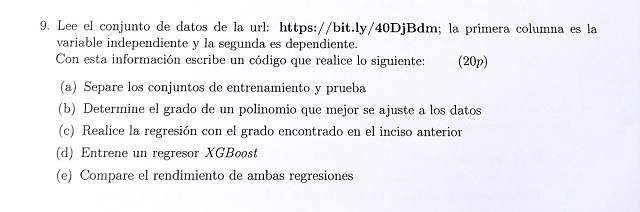

https://bit.ly/40DjBdm

In [ ]:
data = pd.read_csv('poly_reg.csv', header=None)
data.head()

,0,1
0,9.146387,2.157051
1,5.252080,1.439474
2,0.633026,-2.323591
3,3.176071,1.072194
4,2.091358,-0.265403


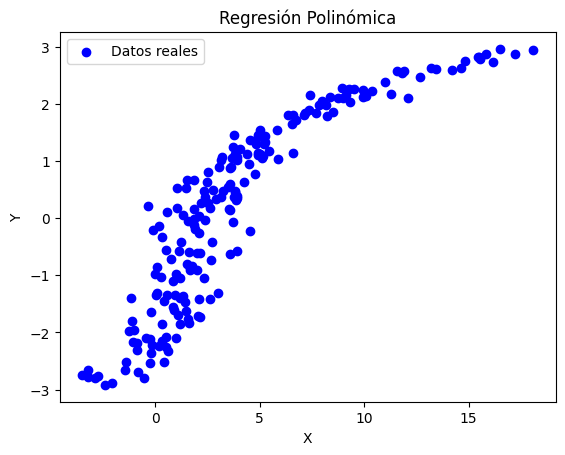

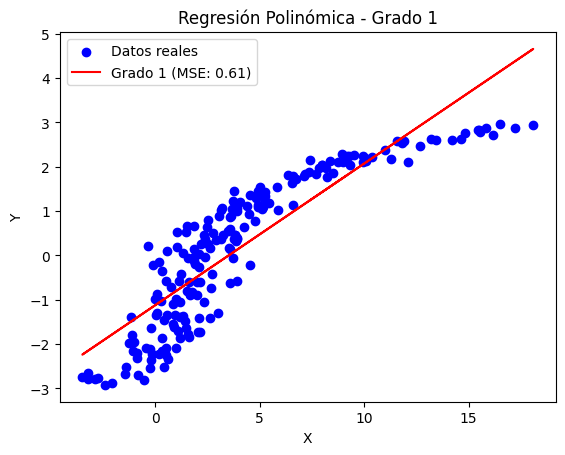

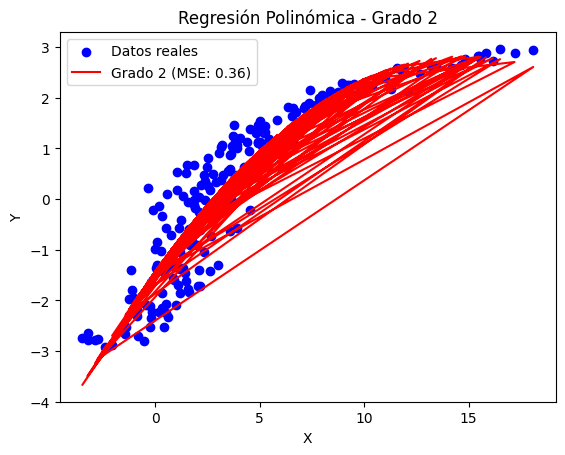

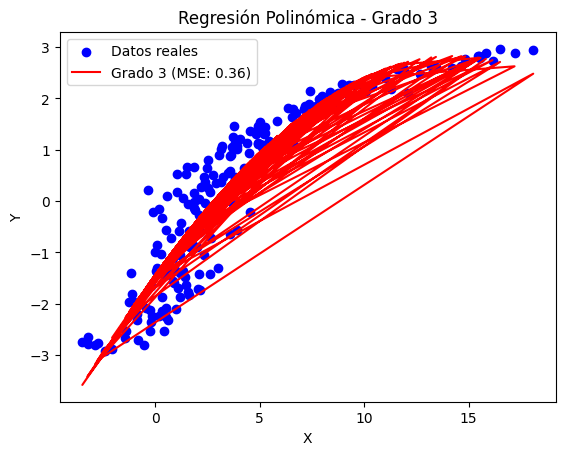

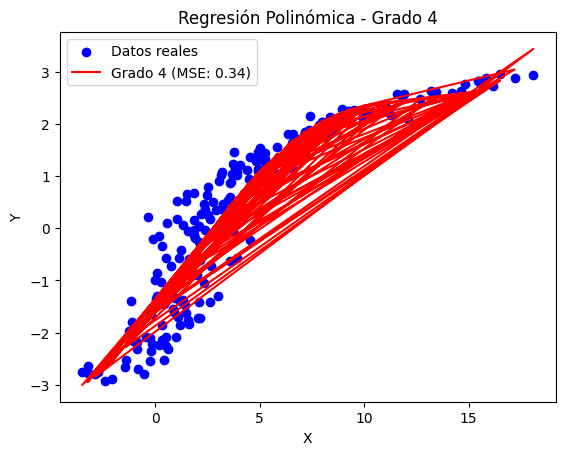

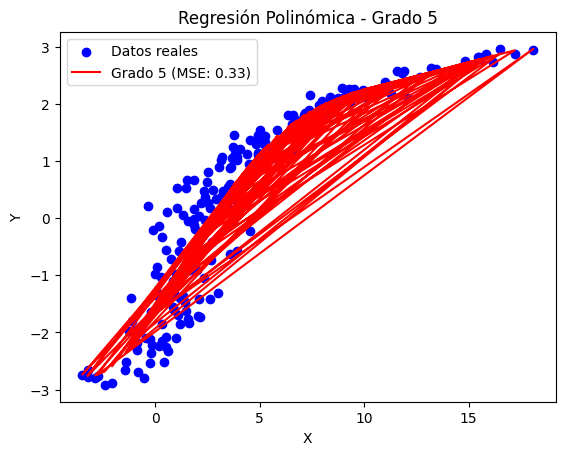

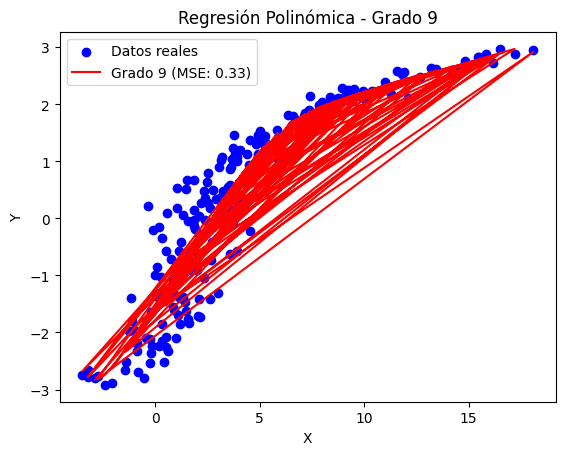

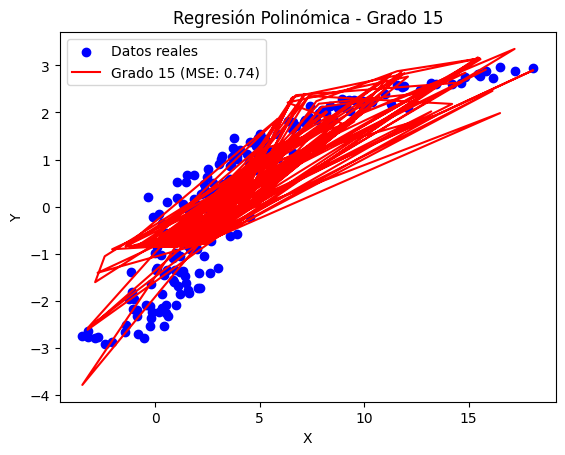

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Cargar datos
data = pd.read_csv('poly_reg.csv', header=None)
data.columns = ['X', 'Y']

# Visualizar datos
plt.scatter(data['X'], data['Y'], color='blue', label='Datos reales')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión Polinómica')
plt.legend()
plt.show()

# Definir función para ajuste polinómico
def polynomial_regression(degree, X, y):
    # Transformar características a un polinomio de grado 'degree'
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)

    # Ajustar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predecir valores
    y_pred = model.predict(X_poly)

    # Calcular el error (MSE)
    mse = mean_squared_error(y, y_pred)

    return model, mse

# Dividir datos en características (X) y variable objetivo (y)
X = data[['X']]
y = data['Y']

# Probar diferentes grados de polinomios
degrees = [1, 2, 3, 4, 5, 9, 15]

for degree in degrees:
    # Ajustar modelo de regresión polinómica
    model, mse = polynomial_regression(degree, X, y)

    # Visualizar resultados
    plt.scatter(X, y, color='blue', label='Datos reales')
    plt.plot(X, model.predict(PolynomialFeatures(degree=degree, include_bias=False).fit_transform(X)), color='red',
             label=f'Grado {degree} (MSE: {mse:.2f})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Regresión Polinómica - Grado {degree}')
    plt.legend()
    plt.show()

No están graficando bien